In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import matplotlib as mpl

import os
import pandas as pd

import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('embrac_20211213.csv', skiprows=1, delimiter=';')
df['Execution Time'] = pd.to_datetime(df['Execution Time'])
df['Handle'] = df['Price'].mul(df['Volume'])
df.head()

,Execution Time,Execution Time UTC,ISIN,Publication Time,Publication Time UTC,CCY,Venue of execution (MIC Code),Venue of publication (MIC Code),Price notation,Transaction to be cleared,MMT Flags,Transaction ID Code,Price,Volume,Buyer,Seller,Trade type,Handle
0,2021-12-13 17:29:30,2021-12-13T16:29:30.230000Z,SE0016828511,2021-12-13 17:29:30,2021-12-13T16:29:30.237000Z,SEK,SSME,SSME,MonetaryAmount,N,1K-------PH---,000897565,91.92,854,JPAG,BBI,NaN,78499.68
1,2021-12-13 17:29:30,2021-12-13T16:29:30.230000Z,SE0016828511,2021-12-13 17:29:30,2021-12-13T16:29:30.237000Z,SEK,SSME,SSME,MonetaryAmount,N,1K-------PH---,000897564,91.92,1385,JPAG,NRD,NaN,127309.20
2,2021-12-13 17:29:30,2021-12-13T16:29:30.230000Z,SE0016828511,2021-12-13 17:29:30,2021-12-13T16:29:30.237000Z,SEK,SSME,SSME,MonetaryAmount,N,1K-------PH---,000897563,91.92,2000,AVA,NRD,NaN,183840.00
3,2021-12-13 17:29:30,2021-12-13T16:29:30.230000Z,SE0016828511,2021-12-13 17:29:30,2021-12-13T16:29:30.237000Z,SEK,SSME,SSME,MonetaryAmount,N,1K-------PH---,000897562,91.92,400,MLEX,NRD,NaN,36768.00
4,2021-12-13 17:29:30,2021-12-13T16:29:30.230000Z,SE0016828511,2021-12-13 17:29:30,2021-12-13T16:29:30.237000Z,SEK,SSME,SSME,MonetaryAmount,N,1K-------PH---,000897561,91.92,430,BBI,NRD,NaN,39525.60


<AxesSubplot:xlabel='Execution Time'>

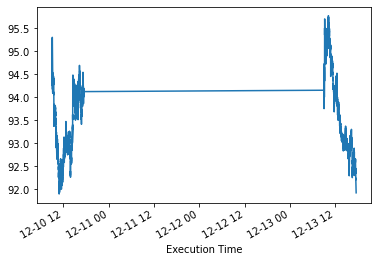

In [17]:
agg = {'Price':'mean', 'Handle':'sum', 'Volume':'sum'}
df = df[['Execution Time','Transaction ID Code','Price','Handle','Volume']].sort_values(by=['Execution Time','Transaction ID Code'])
#df = df.groupby(['Execution Time','Transaction ID Code'],as_index=False).agg(agg)
#df = df.rename(columns={'ISIN':'Trades'})
df.set_index('Execution Time')['Price'].plot()

In [19]:
df = df[(df['Execution Time'].dt.day == 13) & 
        (df['Execution Time'].dt.hour >= 9)].copy()
df = df.reset_index(drop = True)
df['freq'] = df['Execution Time'].diff().dt.seconds
df.head()

,Execution Time,Transaction ID Code,Price,Handle,Volume,freq
0,2021-12-13 09:00:03,000017572,94.15,1318.10,14,NaN
1,2021-12-13 09:00:03,000017573,94.15,282.45,3,0.0
2,2021-12-13 09:00:03,000017574,94.15,4425.05,47,0.0
3,2021-12-13 09:00:03,000017575,94.15,1506.40,16,0.0
4,2021-12-13 09:00:03,000017576,94.15,7908.60,84,0.0


In [20]:
df.tail()

,Execution Time,Transaction ID Code,Price,Handle,Volume,freq
7056,2021-12-13 17:29:30,000897561,91.92,39525.60,430,0.0
7057,2021-12-13 17:29:30,000897562,91.92,36768.00,400,0.0
7058,2021-12-13 17:29:30,000897563,91.92,183840.00,2000,0.0
7059,2021-12-13 17:29:30,000897564,91.92,127309.20,1385,0.0
7060,2021-12-13 17:29:30,000897565,91.92,78499.68,854,0.0


<AxesSubplot:label='b297f567-d4d3-4a44-aaea-f059a281b90e'>

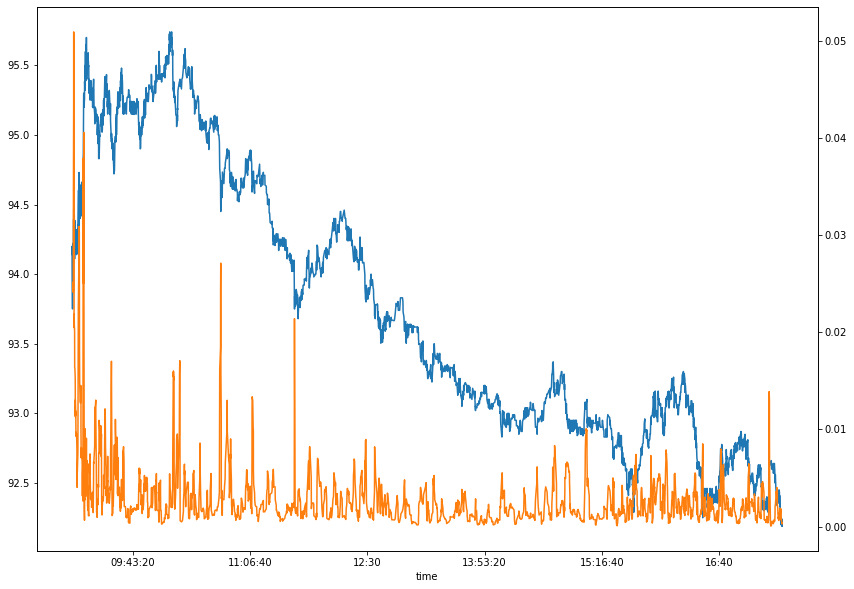

In [31]:
f, ax = plt.subplots(figsize = (14,10))
agg = {'Price':'mean', 'Volume':'sum'}

#df_cell = df[df['Execution Time'].dt.hour>16]

df_cell = df.groupby('Execution Time').agg(agg)
df_cell = df_cell.between_time('9:00', '17:29')
df_cell.index = df_cell.index.time

df_cell['Price'].plot(ax=ax)
df_cell['Price'].rolling(10).var().plot(ax=ax, secondary_y = True)
#df_cell['Volume'].plot(ax=ax, secondary_y = True)


In [27]:
df['hour'] = df['Execution Time'].dt.hour
df['min'] = df['Execution Time'].dt.minute
df['sec'] = df['Execution Time'].dt.second

df.head()

,Execution Time,Transaction ID Code,Price,Handle,Volume,freq,hour,min,sec
0,2021-12-13 09:00:03,000017572,94.15,1318.10,14,NaN,9,0,3
1,2021-12-13 09:00:03,000017573,94.15,282.45,3,0.0,9,0,3
2,2021-12-13 09:00:03,000017574,94.15,4425.05,47,0.0,9,0,3
3,2021-12-13 09:00:03,000017575,94.15,1506.40,16,0.0,9,0,3
4,2021-12-13 09:00:03,000017576,94.15,7908.60,84,0.0,9,0,3


<AxesSubplot:>

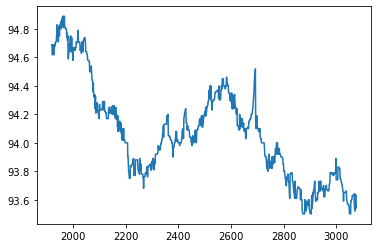

In [33]:
df[(df['hour']>=11) & (df['hour']<=12)]['Price'].plot()

<AxesSubplot:label='48e5d320-0afa-4fb9-82da-bfd2128c8d45'>

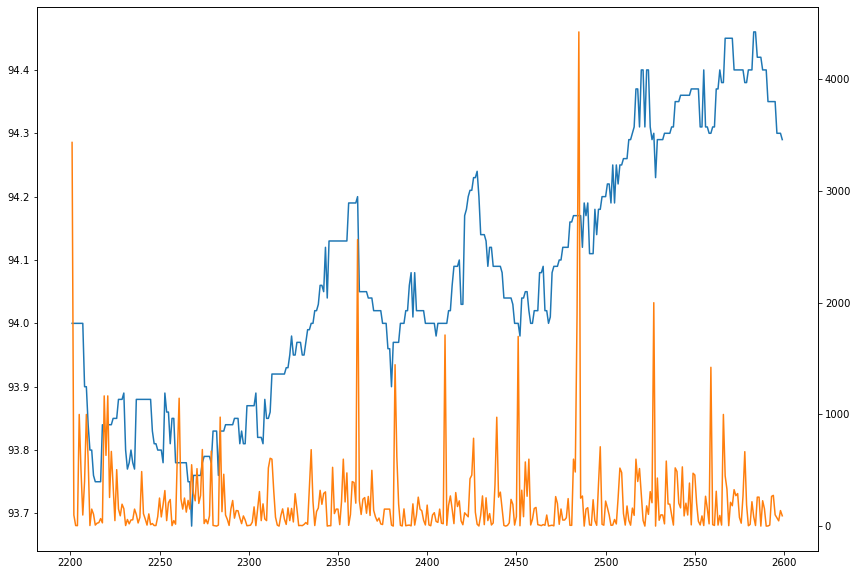

In [36]:
f, ax = plt.subplots(figsize = (14,10))

df_cell = df[(df.index > 2200) & (df.index < 2600)]

ax = df_cell['Price'].plot(ax=ax)
df_cell['Volume'].plot(ax=ax, secondary_y = True)

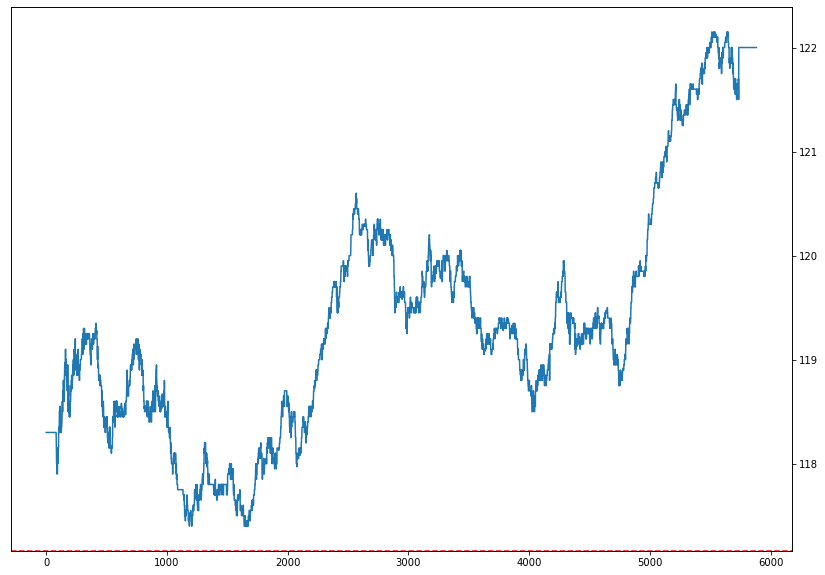

In [21]:
f, ax = plt.subplots(figsize = (14,10))
#df['Volume'].plot(ax=ax)
#df['Price'].diff().rolling(100).median().plot(ax=ax)
df['Price'].plot(ax=ax, secondary_y = True)
ax.axhline(0, ls='--', c='r')

,index,Execution Time,Transaction ID Code,Price,Handle,Volume,freq
35807,NaN,2021-10-14 17:29:56,NaN,117.4,0.0,0.0,NaN
35808,NaN,2021-10-14 17:29:57,NaN,117.4,0.0,0.0,NaN
35809,NaN,2021-10-14 17:29:58,NaN,117.4,0.0,0.0,NaN
35810,NaN,2021-10-14 17:29:59,NaN,117.4,0.0,0.0,NaN
35811,NaN,2021-10-14 17:30:00,NaN,117.4,0.0,0.0,NaN


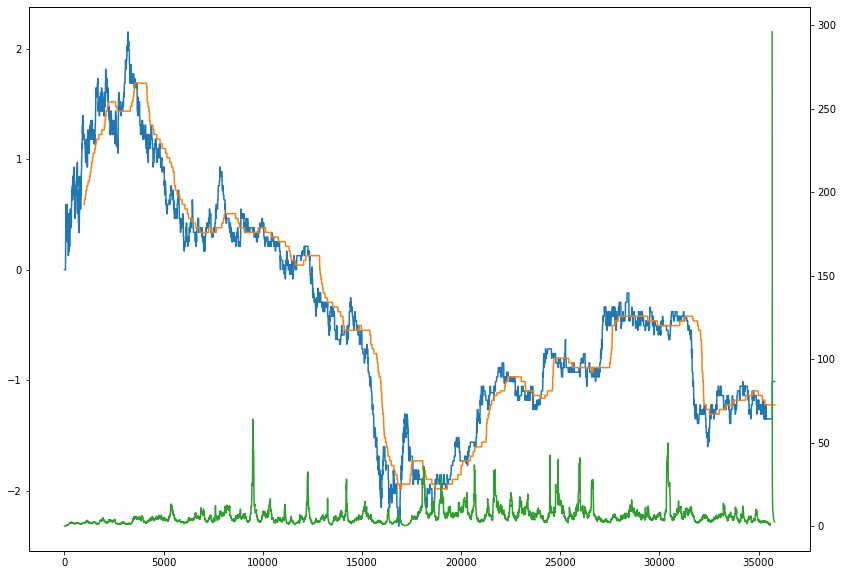

In [29]:
f, ax = plt.subplots(figsize = (14,10))

df['Price'].div(df['Price'].dropna().iloc[0]).mul(100).sub(100).plot(ax=ax)
df['Price'].div(df['Price'].dropna().iloc[0]).mul(100).sub(100).rolling(1000).median().plot(ax=ax)
df['freq'].rolling(200, min_periods=1).mean().plot(ax=ax, secondary_y = True)
#df['Volume'].rolling(1*1).mean().plot(ax=ax, secondary_y = True)
df.tail()

TypeError: Invalid comparison between dtype=int64 and str_

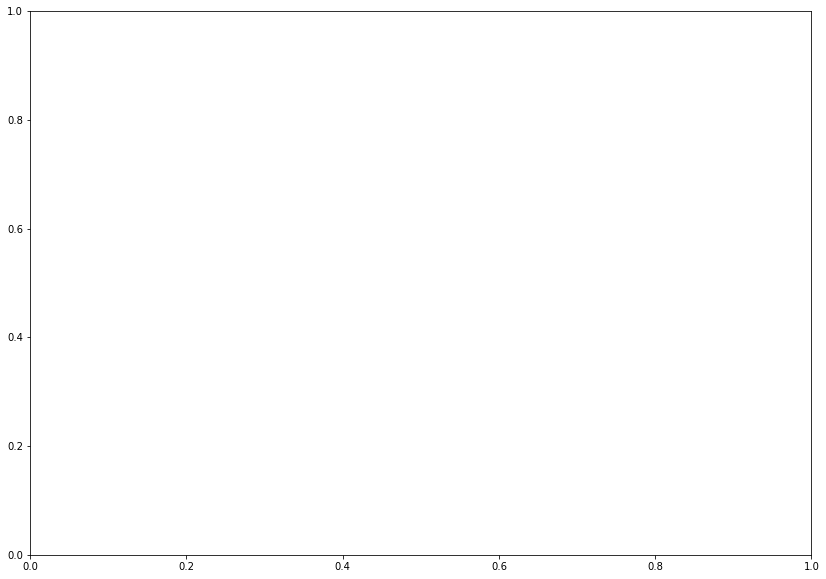

In [76]:
f, ax = plt.subplots(figsize = (14,10))
df_cell = df#[df.index > '2021-09-08 16:30:00']
df_cell = df_cell[df_cell.index < '2021-09-08 17:29:00']
df_cell['Price'].div(df_cell['Price'].dropna().iloc[0]).mul(100).sub(100).plot(ax=ax)
df_cell['Trades'].rolling(60*30).mean().plot(ax=ax, secondary_y = True)
df_cell['Trades'].rolling(1*1).mean().plot(ax=ax, secondary_y = True)

In [221]:
init = 5500
yearly_return = 0.1

my_balance = pd.DataFrame(index = range(10), columns = ['year', 'balance', 'balance_return', 'save', 'save_return', 'return', 'final', 'monthly'])
my_balance['save'] = 100
my_balance['return'] = (1 + yearly_return) ** (my_balance.index + 1)
my_balance['save_return'] = my_balance['save'].mul(my_balance['return']-1).shift(1).fillna(0)
my_balance['balance'] = init# + my_balance['save'].cumsum().fillna(0)
my_balance['balance_return'] = my_balance['balance'].mul(my_balance['return']-1).shift(1).fillna(0)
my_balance['final'] = my_balance['balance'] + my_balance['balance_return'] + my_balance['save'].cumsum() + my_balance['save_return']
my_balance['monthly'] = my_balance['final'].mul(yearly_return).div(12)
my_balance

,year,balance,balance_return,save,save_return,return,final,monthly
0,NaN,5500,0.000000,100,0.000000,1.100000,5600.000000,46.666667
1,NaN,5500,550.000000,100,10.000000,1.210000,6260.000000,52.166667
2,NaN,5500,1155.000000,100,21.000000,1.331000,6976.000000,58.133333
3,NaN,5500,1820.500000,100,33.100000,1.464100,7753.600000,64.613333
4,NaN,5500,2552.550000,100,46.410000,1.610510,8598.960000,71.658000
5,NaN,5500,3357.805000,100,61.051000,1.771561,9518.856000,79.323800
6,NaN,5500,4243.585500,100,77.156100,1.948717,10520.741600,87.672847
7,NaN,5500,5217.944050,100,94.871710,2.143589,11612.815760,96.773465
8,NaN,5500,6289.738455,100,114.358881,2.357948,12804.097336,106.700811
9,NaN,5500,7468.712301,100,135.794769,2.593742,14104.507070,117.537559


In [2]:
import asyncio
from avanza import Avanza, ChannelType
from time import time, ctime
import datetime

time = datetime.datetime.strptime(ctime(1620220062000/1000), "%a %b %d %H:%M:%S %Y")
time.minute

7

In [35]:
def make_binary(x):
    if np.isnan(x):
        return np.nan
    elif x == 0:
        return 0
    elif x < 0:
        return -1
    else:
        return 1

In [36]:
def make_trade(x):
    if np.isnan(x):
        return np.nan
    elif x > 6:
        return 1
    elif x < -2:
        return -1
    else:
        return np.nan

In [17]:
trades = {'long':{'time_buy':np.nan, 
                  'price_buy':0, 
                  'time_sell':np.nan, 
                  'price_sell':0},
         'short':{'time':np.nan, 
                  'price_sell':0, 
                  'price_buy':0}
         }
trades

{'long': {'time_buy': nan, 'price_buy': 0, 'time_sell': nan, 'price_sell': 0},
 'short': {'time': nan, 'price_sell': 0, 'price_buy': 0}}

In [22]:
df_trades = df.set_index('Execution Time')[['Price', 'Handle', 'Volume']].sort_index()

min_of_grace = 10

max_recorded = 0
min_recorded = np.inf

buy_long = 0
buy_short = 0
sell_long = 0
sell_short = 0

nbr_trades_required = 5
count_nbr_trades = 0
stop_loss_pct = 0.01
stop_loss = 0

min_price = np.inf
max_price = 0

for idx, row in df_trades.iterrows():
    
    #GRACE PERIOD
    if (idx.hour == 9) & (idx.minute < min_of_grace):
        if max_recorded < row['Price']:
            max_recorded = row['Price']
            print('New Max:', max_recorded)
        if min_recorded > row['Price']:
            min_recorded = row['Price']
            print('New Min:', max_recorded)
        continue
    
    #COUNT LONGS & SHORTS
    if row['Price'] > max_recorded and buy_long == 0 and buy_short == 0 and count_nbr_trades < nbr_trades_required:
        count_nbr_trades += 1
        print('buy counter:',count_nbr_trades, row['Price'], row['Handle'].round(1))
        continue
    elif row['Price'] < min_recorded and buy_long == 0 and buy_short == 0 and count_nbr_trades < nbr_trades_required:
        count_nbr_trades += 1
        print('sell counter:',count_nbr_trades, row['Price'], row['Handle'].round(1))
        continue
        
    #TRADE TIME
    if (idx.hour == 9) & (idx.minute < 20):
        if row['Price'] > max_recorded and buy_long == 0 and buy_short == 0 and count_nbr_trades >= nbr_trades_required: #Long!
            buy_long = row['Price']
            stop_loss = row['Price'] * (1 - stop_loss_pct)
            print('Time: '+ str(idx))
            print('Go Long: '+str(buy_long))
            print('Set Stop loss: '+str(stop_loss))
            trades['long']['time_buy'] = idx
            trades['long']['price_buy'] = buy_long
            count_nbr_trades = 0
            continue
        elif row['Price'] < min_recorded and buy_short == 0 and buy_long == 0 and count_nbr_trades >= nbr_trades_required: #Short!
            buy_short = row['Price']
            stop_loss = row['Price'] * (1 + stop_loss_pct)
            print('Time: '+str(idx))
            print('Go Short: '+str(buy_short))
            print('Set Stop loss: '+str(stop_loss))
            count_nbr_trades = 0
            continue
            
            
            
    ## HERE!!
    if buy_long > 0 and row['Price'] <= stop_loss and count_nbr_trades < nbr_trades_required: #SELL
        count_nbr_trades += 1
        print('sell counter:',count_nbr_trades, row['Price'], row['Handle'].round(1))
        continue


    if buy_long > 0 and row['Price'] <= stop_loss: #SELL
        sell_long = row['Price']
        print('Time: '+ str(idx))
        print('Close Long:', sell_long)
        trades['long']['time_sell'] = idx
        trades['long']['price_sell'] = sell_long
        break
    
    elif buy_long > 0 and row['Price'] > buy_long and row['Price'] > max_price: #Increase stop loss
        stop_loss = row['Price'] * (1 - stop_loss_pct)
        print('Increase stop limit:', stop_loss)
        
    elif buy_short > 0 and row['Price'] >= stop_loss: #Buy back:
        sell_short = row['Price']
        print('Time: '+ str(idx))
        print('Close short', sell_short)
        break
    elif buy_short > 0 and row['Price'] < buy_short and row['Price'] < min_price: #Decrease stop loss
        stop_loss = row['Price'] * (1 + stop_loss_pct)
        print('Adjust stop loss: '+str(stop_loss))
        
    last_trade = row['Price']
    max_price = max(max_price, row['Price'])
    min_price = min(min_price, row['Price'])
    
print(max_recorded, min_recorded)

New Max: 1495.0
New Min: 1495.0
New Max: 1498.6
New Max: 1498.8
New Max: 1499.0
New Max: 1502.0
New Max: 1502.8
New Max: 1503.2
New Max: 1504.2
New Max: 1506.0
New Max: 1506.4
New Max: 1506.8
New Max: 1509.0
New Max: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Min: 1510.0
New Max: 1511.0
New Max: 1513.6
New Max: 1513.8
New Max: 1515.0
New Max: 1515.2
New Max: 1515.4
New Max: 1515.6
New Max: 1516.0
New Max: 1516.4
New Max: 1517.0
New Max: 1518.0
buy counter: 1 1518.2 168520.2
buy counter: 2 1519.0 6076.0
buy counter: 3 1519.0 221774.0
buy counter: 4 1518.8 72902.4
buy counter: 5 

In [19]:
df_trades

,Price,Handle,Volume
Execution Time,,,
2021-04-27 09:00:02,1495.0,68770.0,46
2021-04-27 09:00:02,1495.0,14950.0,10
2021-04-27 09:00:02,1495.0,1495.0,1
2021-04-27 09:00:02,1495.0,4485.0,3
2021-04-27 09:00:02,1495.0,7475.0,5
...,...,...,...
2021-04-27 17:29:30,1671.2,66848.0,40
2021-04-27 17:29:30,1671.2,8417834.4,5037
2021-04-27 17:29:30,1671.2,5545041.6,3318


In [20]:
(2*2+1*1)/3

1.6666666666666667

Text(2021-04-27 09:31:53, 1562.8, '2.87%')

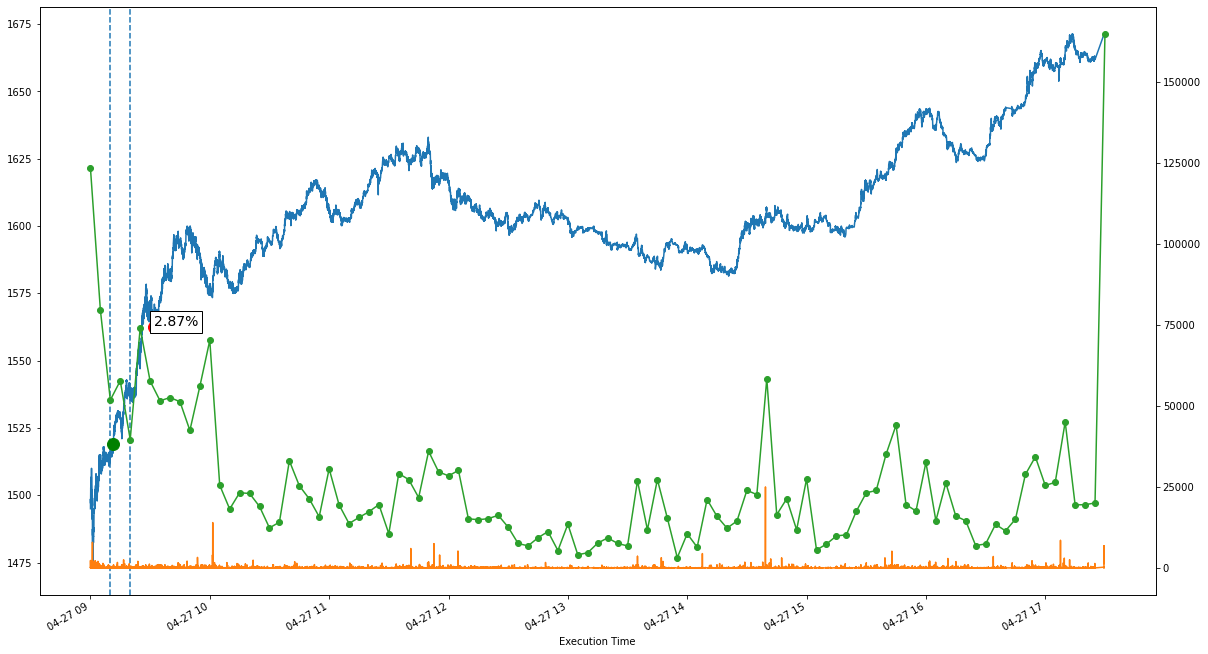

In [53]:
f, ax = plt.subplots(figsize = (20, 12))


ax = df_trades['Price'].plot(ax=ax)
df_trades['Volume'].plot(ax=ax, secondary_y = True)
agg = {'Price':'mean','Handle':'sum','Volume':'sum'}
df_trades_time = df_trades.reset_index()
df_trades_time = df_trades_time.groupby(df_trades_time['Execution Time'].dt.round('5min')).agg(agg)
df_trades_time['Price_weighted'] = df_trades_time['Handle'].div(df_trades_time['Volume'])

df_trades_time['Volume'].plot(ax=ax, secondary_y = True, marker='o')

ax.axvline('2021-04-27 09:10:00', ls='--')
ax.axvline('2021-04-27 09:20:00', ls='--')
#df_trades.loc[trades['long']['time']].plot()
ax.plot(trades['long']['time_buy'], trades['long']['price_buy'], marker='o', c='g', ms=12)
ax.plot(trades['long']['time_sell'], trades['long']['price_sell'], marker='o', c='r', ms=12)
pct_gain = trades['long']['price_sell']/trades['long']['price_buy']
ax.text(x=trades['long']['time_sell'], y=trades['long']['price_sell']+0.2, 
        s=f'{round(100*(pct_gain-1), 2)}%', fontsize = 14, bbox=dict(facecolor='white', alpha=1))
#max_ = df_cell[df_cell.index<'2021-04-23 09:10:00']['Price_max'].max()
#min_ = df_cell[df_cell.index<'2021-04-23 09:10:00']['Price_min'].min()
#ax[0].axhline(max_, ls='--')
#ax[0].axhline(min_, ls='--')

In [115]:
df_trades_time

,Price,Handle,Volume,Price_weighted
Execution Time,,,,
2021-04-27 09:00:00,157.206361,48678838.60,309121,157.475030
2021-04-27 10:00:00,160.196475,70853112.28,442284,160.198226
2021-04-27 11:00:00,161.140414,46122060.27,286124,161.196056
2021-04-27 12:00:00,161.495951,28034592.65,173591,161.497962
2021-04-27 13:00:00,160.444506,19031275.20,118639,160.413314


In [107]:
df_trades

,Price,Handle,Volume
Execution Time,,,
2021-04-27 09:00:02,156.45,625.80,4
2021-04-27 09:00:02,156.45,2503.20,16
2021-04-27 09:00:02,156.45,5006.40,32
2021-04-27 09:00:02,156.45,4380.60,28
2021-04-27 09:00:02,156.45,782.25,5
...,...,...,...
2021-04-27 13:08:15,159.55,12444.90,78
2021-04-27 13:08:15,159.55,14040.40,88
2021-04-27 13:08:40,159.60,159.60,1


In [335]:
agg = {'Price':['mean', 'min', 'max'], 'Volume':['sum']}
df_cell = df.groupby(df['Execution Time'].dt.round('min')).agg(agg)
df_cell.columns = [ '_'.join(x) for x in df_cell.columns]
df_cell['diff'] = df_cell['Price_mean'].diff()
df_cell['binary_up_down'] = df_cell['Price_mean'].diff().apply(make_binary)
df_cell['binary_up_down_cumsum'] = df_cell['binary_up_down'].cumsum()
df_cell['binary_up_down_rolling'] = df_cell['binary_up_down'].rolling(20).sum()
df_cell['pct_change'] = df_cell['Price_mean'].pct_change()
df_cell['abs_pct_change'] = df_cell['Price_mean'].div(df_cell['Price_mean'].iloc[0])-1
df_cell['mini'] = df_cell['pct_change'].mul(df_cell['Price_mean'].shift(0)).div(df_cell['Price_mean'].iloc[0]).cumsum()
df_cell['trade'] = df_cell['binary_up_down_rolling'].apply(make_trade).ffill().fillna(0).diff().replace(-2,-1).replace()
df_cell.head(110)

,Price_mean,Price_min,Price_max,Volume_sum,diff,binary_up_down,binary_up_down_cumsum,binary_up_down_rolling,pct_change,abs_pct_change,mini,trade
Execution Time,,,,,,,,,,,,
2021-04-27 09:00:00,156.446269,156.20,156.50,21737,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2021-04-27 09:01:00,155.786854,155.00,156.40,20368,-0.659414,-1.0,-1.0,NaN,-0.004215,-0.004215,-0.004197,0.0
2021-04-27 09:02:00,155.700000,155.05,156.20,6733,-0.086854,-1.0,-2.0,NaN,-0.000558,-0.004770,-0.004752,0.0
2021-04-27 09:03:00,156.341667,156.10,156.45,1597,0.641667,1.0,-1.0,NaN,0.004121,-0.000669,-0.000634,0.0
2021-04-27 09:04:00,156.290244,156.00,156.50,16546,-0.051423,-1.0,-2.0,NaN,-0.000329,-0.000997,-0.000962,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-27 10:45:00,161.452000,161.30,161.60,7771,0.139500,1.0,7.0,2.0,0.000865,0.031996,0.032159,0.0
2021-04-27 10:46:00,161.589583,161.45,161.65,3493,0.137583,1.0,8.0,4.0,0.000852,0.032876,0.033039,0.0
2021-04-27 10:47:00,161.477586,161.35,161.60,10889,-0.111997,-1.0,7.0,4.0,-0.000693,0.032160,0.032324,0.0


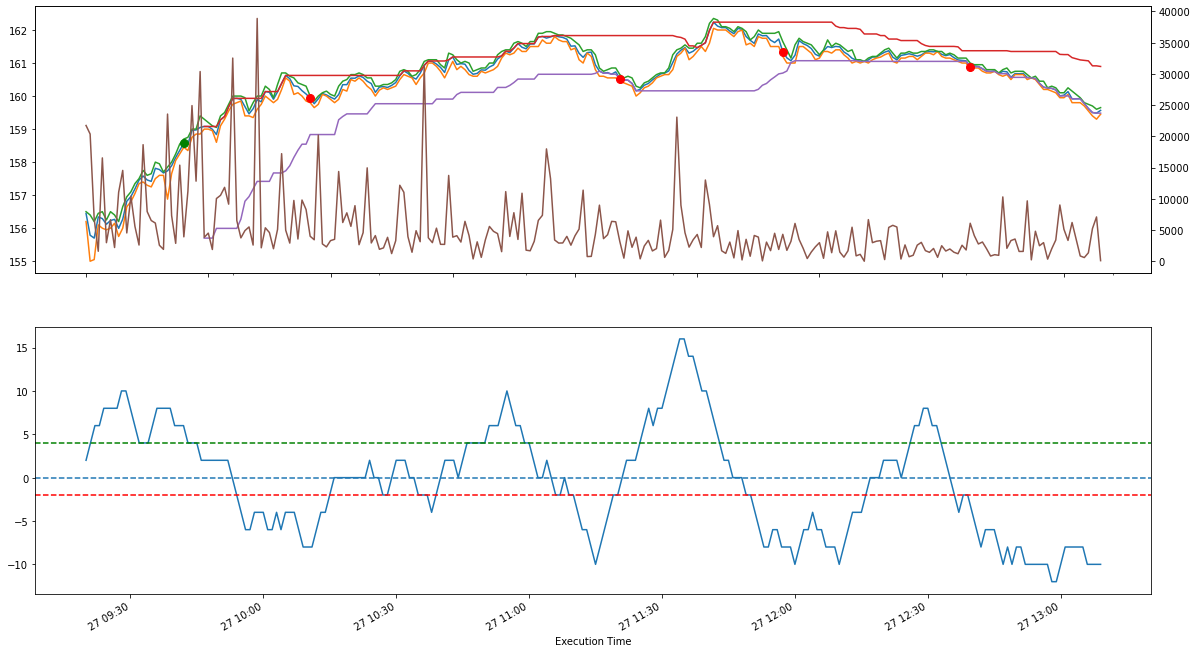

In [336]:
import datetime

f, ax = plt.subplots(2,1,figsize = (20,12))

df_cell['Price_mean'].plot(ax=ax[0])
df_cell['Price_min'].plot(ax=ax[0])
df_cell['Price_max'].plot(ax=ax[0])
df_cell['Price_mean'].rolling(30).max().plot(ax=ax[0])
df_cell['Price_mean'].rolling(30).min().plot(ax=ax[0])
df_cell.loc[df_cell['trade'] == 1, 'Price_mean'].plot(ax=ax[0], marker='o', ls='', c='g', ms=8)
df_cell.loc[df_cell['trade'] == -1, 'Price_mean'].plot(ax=ax[0], marker='o', ls='',c='r', ms=8)
df_cell['Volume_sum'].plot(ax=ax[0], secondary_y=True)
df_cell['binary_up_down_rolling'].plot(ax=ax[1])
ax[1].axhline(0,ls='--')
ax[1].axhline(4,ls='--', c='g')
ax[1].axhline(-2,ls='--', c='r')

#ax[0].axvline('2021-04-23 09:05:00', ls='--')
#ax[0].axvline('2021-04-23 09:20:00', ls='--')

#max_ = df_cell[df_cell.index<'2021-04-23 09:10:00']['Price_max'].max()
#min_ = df_cell[df_cell.index<'2021-04-23 09:10:00']['Price_min'].min()

ax[0].axhline(max_, ls='--')
ax[0].axhline(min_, ls='--')


<AxesSubplot:xlabel='Execution Time,Execution Time'>

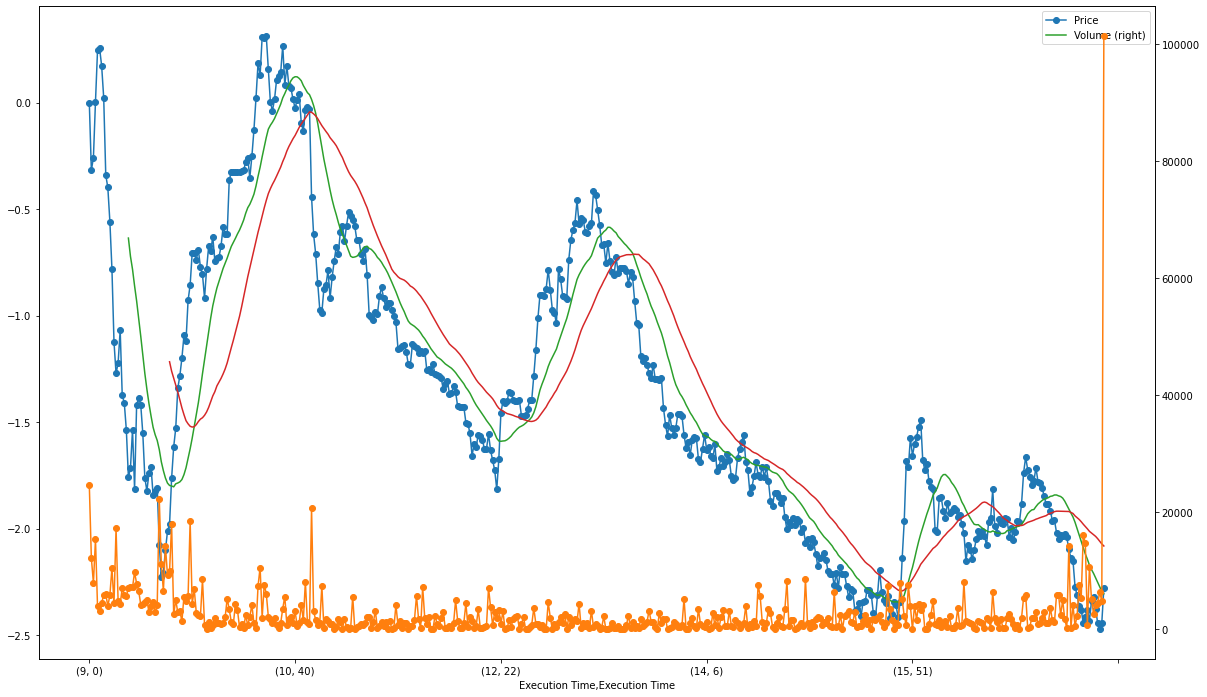

In [12]:
f, ax = plt.subplots(figsize = (20,12))
df_cell = df.groupby([df['Execution Time'].dt.hour, df['Execution Time'].dt.minute])[['Handle', 'Volume']].sum()
df_cell['Price'] = df_cell['Handle'].div(df_cell['Volume'])
df_cell['Price'] = df_cell['Price'].div(df_cell['Price'].iloc[0]).sub(1).mul(100)
df_cell[['Price', 'Volume']].plot(secondary_y='Volume', ax=ax, marker= 'o')
df_cell['Price'].rolling(20).mean().plot()
df_cell['Price'].rolling(40).mean().plot()

In [88]:
hashlib.sha1

<function _hashlib.openssl_sha1(string=b'')>

In [71]:
import hashlib
import pyotp
totp = pyotp.TOTP('HRN33P7MFHRHY6VH5HQHR54RGEH6NODQ', digest=hashlib.sha1)
print(totp.now())

980615


In [105]:
from avanza import Avanza
avanza = Avanza({
    'username': 'HjartarsonErik',
    'password': 'uzLfiSqA',
    'totpSecret': 'HRN33P7MFHRHY6VH5HQHR54RGEH6NODQ'
})

overview = avanza.get_overview()
overview


{'accounts': [{'accountType': 'AktieFondkonto',
   'interestRate': 0.0,
   'depositable': True,
   'performance': 0.0,
   'performancePercent': 0.0,
   'totalProfit': 0.0,
   'attorney': False,
   'active': True,
   'accountId': '1413126',
   'accountPartlyOwned': False,
   'tradable': True,
   'totalBalance': 0.68,
   'totalBalanceDue': 0.0,
   'ownCapital': 0.49,
   'buyingPower': 0.49,
   'totalProfitPercent': 0.0,
   'name': '1413126'},
  {'accountType': 'AktieFondkonto',
   'interestRate': 0.0,
   'depositable': True,
   'performance': 0.0,
   'performancePercent': 0.0,
   'totalProfit': 0.0,
   'attorney': True,
   'active': True,
   'accountId': '3048281',
   'accountPartlyOwned': False,
   'tradable': True,
   'totalBalance': 0.0,
   'totalBalanceDue': 0.0,
   'ownCapital': 0.0,
   'buyingPower': 0.0,
   'totalProfitPercent': 0.0,
   'name': '3048281'},
  {'accountType': 'AktieFondkonto',
   'interestRate': 0.0,
   'depositable': True,
   'performance': 0.0,
   'performancePerc

In [99]:
df = pd.DataFrame(data['dataSeries'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,value
0,2020-10-19 00:00:00+02:00,35.00
1,2020-10-20 00:00:00+02:00,35.28
2,2020-10-21 00:00:00+02:00,33.66
3,2020-10-22 00:00:00+02:00,30.82
4,2020-10-23 00:00:00+02:00,31.86


<AxesSubplot:xlabel='timestamp'>

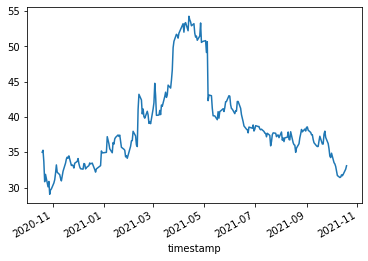

In [101]:
df.groupby('timestamp')['value'].sum().plot()

In [115]:
Avanza.Search('KIND')

AttributeError: type object 'Avanza' has no attribute 'Search'

In [168]:
from avanza import Avanza, ChannelType, TimePeriod, ListType


#avanza = Avanza({
#    'username': 'HjartarsonErik',
#    'password': 'uzLfiSqA',
#    'totpSecret': 'HRN33P7MFHRHY6VH5HQHR54RGEH6NODQ'
#    })

data = avanza.get_chart_data(order_book_id = '643616', period=TimePeriod.ONE_YEAR)

#avanza.get_transactions

TypeError: get_chart_data() got an unexpected keyword argument 'isin'

In [42]:
from time import time
time('2020')

TypeError: time() takes no arguments (1 given)

In [6]:
#avanza.get_chart_data(order_book_id = '643616', period=TimePeriod.TODAY)

In [51]:
pd.to_datetime(df['dataSeries'][0]['timestamp']).timestamp()

1620630000.0

In [149]:
#avanza.get_inspiration_lists()

In [174]:
a = avanza.search_for_stock('Avanza')
a

{'totalNumberOfHits': 1,
 'hits': [{'instrumentType': 'STOCK',
   'numberOfHits': 1,
   'topHits': [{'currency': 'SEK',
     'lastPrice': 329.7,
     'changePercent': -0.09,
     'flagCode': 'SE',
     'tradable': True,
     'tickerSymbol': 'AZA',
     'name': 'Avanza Bank Holding',
     'id': '5361'}]}]}

In [132]:
avanza.get_stock_info('Avanza Zero')

HTTPError: 400 Client Error: Bad Request for url: https://www.avanza.se/_mobile/market/stock/Avanza%20Zero